# Estatística de coleção e Lei de Zipf

###Descrição da atividade

Nessa atividade iremos exercitar alguns conceitos sobre processamento de texto vistos em sala de aula usando a coleção coletada pelo crawler de sites de notícias. Diante disso, iremos responder algumas perguntas ao decorrer do notebook.

### Importando pacotes e dados

Antes de tudo, é necessário importar os pacotes que serão utilizados para manipulação dos dados, processamento textual, visualização e o csv que reúne as notícias coletadas anteriormente.

In [110]:
import pandas as pd
import numpy as np

import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [0]:
elpais = pd.read_csv("https://raw.githubusercontent.com/ivynasantino/mineracao-de-dados/master/02-processamento_de_texto/data/results.csv")

###Depois de importar os dados e pacotes necessários, vamos aos exercícios.

Inicialmente iremos reproduzir a tabela 4.1 do livro [Search Enigmes](http://ciir.cs.umass.edu/downloads/SEIRiP.pdf), na qual traz informações estatísticas como número de ocorrência das palavras, tamanho do vocabulário entre outros contido na nossa base de dados que serão exibidos a seguir. 

#### Obs.: Para evitar repetição de código, fiz uma função para gerar a lista de palavras e de bigramas posteriormente.

In [0]:
toker = RegexpTokenizer(r'\w+')
stopwords = stopwords.words("portuguese")

def tokens(type_token):
  result = []
  for n in elpais.text:
    tokens = [token for token in toker.tokenize(n.lower())]
  if type_token == 'bigram':
    result.extend(list(nltk.bigrams(tokens)))
  elif type_token == 'statistics collection':
    result.extend(tokens)
  return result

In [113]:
total_docs = elpais.text.count()

wl = tokens('statistics collection')

total_word_occur = len(wl) 
vocabulary_size = len(set(wl)) 

words = pd.DataFrame(wl, columns = ['word'])

word_count = words.word.value_counts().reset_index()

word_count.columns = ['word', 'freq']
word_count['r'] = word_count.freq.rank(ascending = False, 
                                       method = 'first')

occur_th = len(word_count[word_count.freq > 1000])

occur_once = len(word_count[word_count.freq == 1])


sta = ['Total documents', 
       'Total word occurences', 
       'Vocabulary size', 
       'Words occuring > 1000 times', 
       'Words occuring once']

values = [total_docs, 
          total_word_occur, 
          vocabulary_size, 
          occur_th, 
          occur_once]

table = pd.DataFrame(data = {'statistics collection': sta,
                            'values': values})

table


,statistics collection,values
0,Total documents,249
1,Total word occurences,3456
2,Vocabulary size,1162
3,Words occuring > 1000 times,0
4,Words occuring once,793


O próximo passo é mostrar as palavras top-50 que aparecem nos textos das notícias, assim como na tabela 4.2 do livro.

In [114]:
word_count['Pr(%)'] = round((word_count.freq / total_word_occur) * 100, 3)
word_count['r.Pr'] = round(word_count.r * word_count['Pr(%)'] / 100, 2)

word_count[:50]

,word,freq,r,Pr(%),r.Pr
0,de,150,1.0,4.340,0.04
1,e,109,2.0,3.154,0.06
2,que,88,3.0,2.546,0.08
3,a,80,4.0,2.315,0.09
4,o,66,5.0,1.910,0.10
5,do,58,6.0,1.678,0.10
6,com,52,7.0,1.505,0.11
7,um,49,8.0,1.418,0.11
8,em,48,9.0,1.389,0.13
9,as,45,10.0,1.302,0.13


Podemos observar que as palavras que mais se repetem são artigos, conjunções e preposições, na mineração de dados, mais conhecidas como stopwords. Dessa maneira, após esses tipos de palavras a que mais se repete nos textos é a palavra marido ocupando a posição 14ª, tendo sido repetida 31 vezes nos textos do site El país.

Já no terceiro exercício, iremos visualizar a curva de rank-frequência usando a escala logaritmica para as palavras e os bigramas coletados.

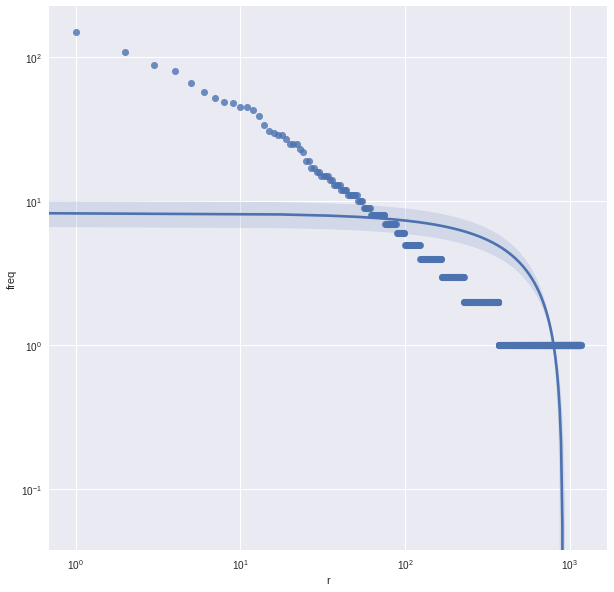

In [115]:
%matplotlib inline

f, ax = plt.subplots(figsize = (10, 10))
ax.set(xscale = 'log', 
       yscale = 'log')

sns.regplot('r', 
            'freq', 
            word_count, 
            ax = ax, 
            scatter_kws = {'s': 50})

In [116]:
bl = tokens('bigram')

bigrams_words = [bigram[0] + ' ' + bigram[1] for bigram in bl]

bigrams_df = pd.DataFrame(bigrams_words, columns=['bigram'])

bigram_count = bigrams_df.bigram.value_counts().reset_index()

bigram_count.columns = ['bigram', 'freq']
bigram_count['r'] = bigram_count.freq.rank(ascending = False, 
                                           method = 'first')

bigram_count[:50]

,bigram,freq,r
0,seu marido,13,1.0
1,do califado,12,2.0
2,para a,12,3.0
3,meu marido,11,4.0
4,com o,10,5.0
5,do ei,9,6.0
6,na espanha,9,7.0
7,campo de,8,8.0
8,de acolhida,8,9.0
9,do campo,7,10.0


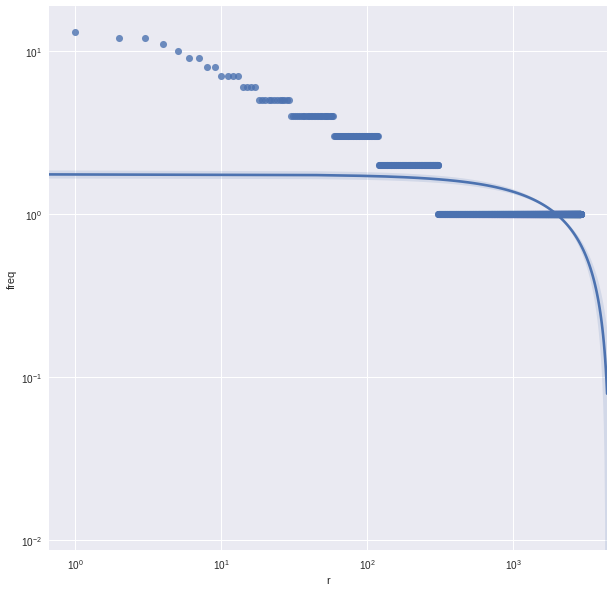

In [117]:
%matplotlib inline

f, ax = plt.subplots(figsize = (10, 10))
ax.set(xscale = 'log', 
       yscale = 'log')
sns.regplot('r', 
            'freq', 
            bigram_count, 
            ax = ax, 
            scatter_kws = {'s': 50})

#### Observando os gráficos acima, quais os melhores valores do parâmetro c para cada curva?

A visualizações acima, ambas, seguem o mesmo modelo de conter muitas palavras repetidas(stopwords) e ao final, palavras com maior significado para o texto aparecerem com menos frequência. Dessa forma, pode-se observar uma curva descrescendo rapidamente possivelmente no encontro do número dessa palavras nos dois gráficos, sendo que, a particularidade do gráfico dos bigramas terem pontos bem próximos no eixo y devido as repetições das palavras no agrupamento em par. 

Por fim, logo abaixo iremos observar a tabela 4.5 do livro

In [118]:
def get_occurences(n):
  return len(word_count[word_count.freq == n])

occur_count = []
for i in range(1,11):
  occur_count.append(i)

pred_proportion = []
for i in occur_count:
  pred_proportion.append(round(1.0 / (i*(i + 1)), 3))

actual_proportion = []
for i in occur_count:
  actual_proportion.append(round(get_occurences(i) / vocabulary_size, 3))
  
actual_occur_word = []
for i in occur_count:
  actual_occur_word.append(get_occurences(i))
  
columns = ['Number of occurences', 
           'Predicted proportion', 
           'Actual proportion',
          'Actual number of words']

values = [occur_count, 
          pred_proportion, 
          actual_proportion, 
          actual_occur_word]

table = pd.DataFrame(data = np.transpose(values), 
                     columns = columns)
table


,Number of occurences,Predicted proportion,Actual proportion,Actual number of words
0,1.0,0.500,0.682,793.0
1,2.0,0.167,0.122,142.0
2,3.0,0.083,0.052,61.0
3,4.0,0.050,0.037,43.0
4,5.0,0.033,0.021,24.0
5,6.0,0.024,0.009,11.0
6,7.0,0.018,0.011,13.0
7,8.0,0.014,0.012,14.0
8,9.0,0.011,0.005,6.0
9,10.0,0.009,0.003,4.0
